In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(42)
sns.set_style('white')
sys.path.insert(0, '../')

import torch
from fig_helpers import add_metrics_to_df

results_df = pd.concat([pd.read_csv('./results/robustness_ours_underestimate_results'),
                        pd.read_csv('./results/robustness_supervised_underestimate_results'),
                        pd.read_csv('./results/robustness_sar-em_underestimate_results'),
                        pd.read_csv('./results/robustness_scar-km2_underestimate_results'),
                        pd.read_csv('./results/robustness_negative_underestimate_results')],
                       ignore_index=True)
results_df = pd.read_csv('./results/robustness_ours_underestimate_results')
results_df = add_metrics_to_df(results_df)

# g2_mean is stored as vector - g1 mean = 1, so we add a column 
# corresponding to the g2 mean
results_df['g2_mean_scalar'] = 1 + results_df['group_gap']
set(results_df['g2_mean_scalar'])

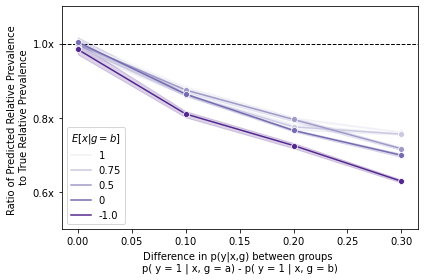

In [3]:
group_gap_results  = results_df
colors = ['#f2f0f7', '#cbc9e2', '#9e9ac8', '#756bb1', '#54278f']

g = sns.lineplot(x='p_y_diff', y='rel_prior_err_pct', hue='g2_mean_scalar',
             marker='o',
             hue_order=[1, .75, .5, 0, -1.0],
             palette=colors,
             data=group_gap_results)
plt.xlabel("Difference in p(y|x,g) between groups \np( y = 1 | x, g = a) - p( y = 1 | x, g = b)")
plt.ylabel("Ratio of Predicted Relative Prevalence \n to True Relative Prevalence")

g.set_ylim([.5, 1.1])
g.set_yticks([.6, .8, 1.0])
g.set_yticklabels(["0.6x", "0.8x",  "1.0x"])

g.axhline(y=1.0, color='black', linestyle='--', zorder=1,
                   linewidth=1)
g.get_legend().set_title('$E[x|g=b]$')

plt.tight_layout()
plt.savefig('./fig4.pdf', format='pdf', dpi=600)